In [67]:
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  #load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [68]:
# get the stock quote of a corporation (Apple Inc.)
# df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2021-12-17')
# df = pd.read_csv('../db/Tesla.csv')
# df = pd.read_csv('../db/AAPL.csv')
df = pd.read_csv('../input/Apple.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-06-13,24.780001,24.275000,24.672501,24.334999,152082000.0,22.733387,AAPL
1,2016-06-14,24.620001,24.187500,24.330000,24.365000,127727600.0,22.761415,AAPL
2,2016-06-15,24.602501,24.257500,24.455000,24.285000,117780800.0,22.686680,AAPL
3,2016-06-16,24.437500,24.017500,24.112499,24.387501,125307200.0,22.782436,AAPL
4,2016-06-17,24.162500,23.825001,24.155001,23.832500,244032800.0,22.263964,AAPL
...,...,...,...,...,...,...,...,...
1253,2021-06-04,126.160004,123.849998,124.070000,125.889999,75169300.0,125.889999,AAPL
1254,2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.900002,AAPL
1255,2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998,AAPL
1256,2021-06-09,127.750000,126.519997,127.209999,127.129997,56788000.0,127.129997,AAPL


In [69]:
# get the number of rows and columns in the data set
df.shape

(1258, 8)

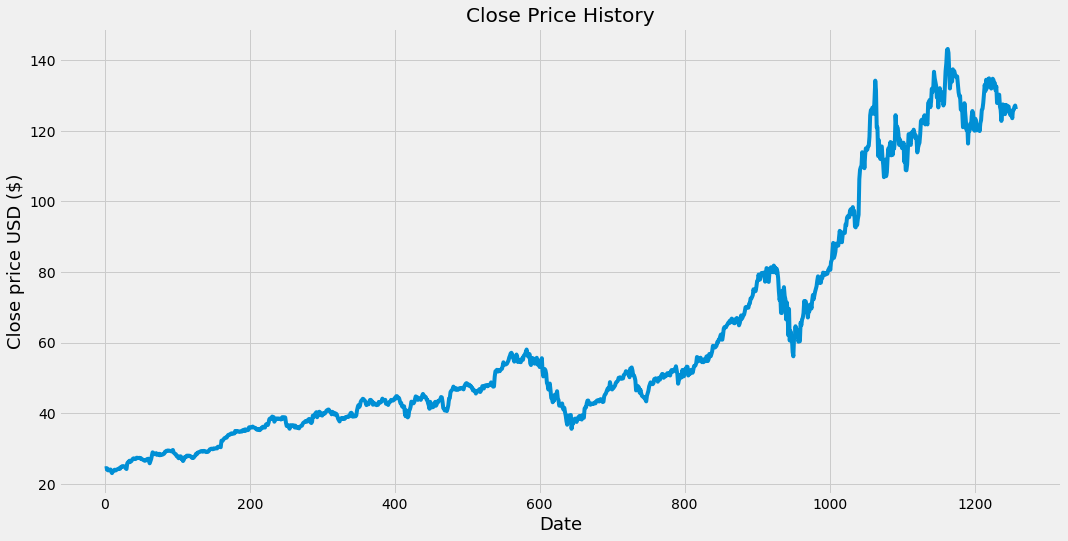

In [70]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [71]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1007

In [72]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.01102787],
       [0.01127757],
       [0.01061173],
       ...,
       [0.86333745],
       [0.86658339],
       [0.85809403]])

In [73]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([0.01102787, 0.01127757, 0.01061173, 0.01146484, 0.00684561,
       0.00636704, 0.00805244, 0.00730338, 0.00844777, 0.0028298 ,
       0.        , 0.00322513, 0.00491053, 0.0074074 , 0.00801082,
       0.00613815, 0.00726175, 0.00811486, 0.0096546 , 0.01027882,
       0.01119433, 0.01004994, 0.01404494, 0.01402413, 0.01620891,
       0.01629214, 0.0164794 , 0.01537661, 0.01377445, 0.01102787]), array([0.01127757, 0.01061173, 0.01146484, 0.00684561, 0.00636704,
       0.00805244, 0.00730338, 0.00844777, 0.0028298 , 0.        ,
       0.00322513, 0.00491053, 0.0074074 , 0.00801082, 0.00613815,
       0.00726175, 0.00811486, 0.0096546 , 0.01027882, 0.01119433,
       0.01004994, 0.01404494, 0.01402413, 0.01620891, 0.01629214,
       0.0164794 , 0.01537661, 0.01377445, 0.01102787, 0.00963379]), array([0.01061173, 0.01146484, 0.00684561, 0.00636704, 0.00805244,
       0.00730338, 0.00844777, 0.0028298 , 0.        , 0.00322513,
       0.00491053, 0.0074074 , 0.00801082, 0.00613815, 0.

In [74]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [75]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(977, 30, 1)

In [76]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [77]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('../out/APPL_LSTM_1.h5')

977/977 [==============================] - 17s 14ms/step - loss: 0.0021


In [79]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [80]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [81]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [82]:
# get the models predicted price values
# model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [83]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.05403325662195

/Users/anhnguyenhoang/miniconda/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


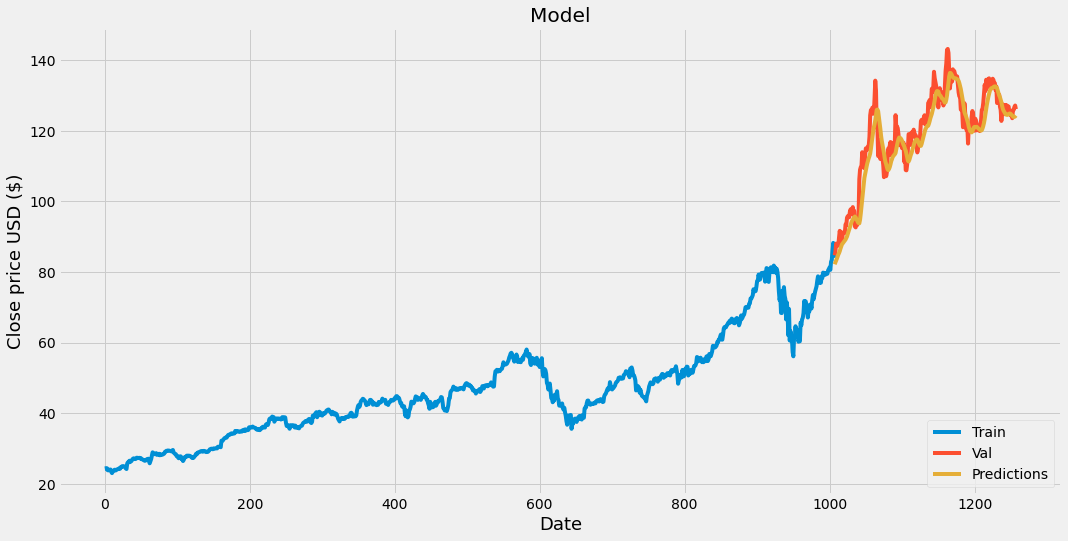

In [84]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [85]:
# show the valid and predicted prices
valid

,Close,Prediction
1007,84.699997,82.162025
1008,85.747498,82.674065
1009,88.019997,83.141678
1010,87.897499,83.740608
1011,87.932503,84.340347
...,...,...
1253,125.889999,124.004868
1254,125.900002,123.908928
1255,126.739998,123.912766
1256,127.129997,124.060181


In [86]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
# valid.to_csv('../out/Tesla_LSTM_1.csv')
# valid.to_csv('../out/AAPL_LSTM_1.csv')
valid.to_csv('../out/LSTM/Apple.csv')
valid

,Close,Prediction
Date,,
2020-06-12,84.699997,82.162025
2020-06-15,85.747498,82.674065
2020-06-16,88.019997,83.141678
2020-06-17,87.897499,83.740608
2020-06-18,87.932503,84.340347
...,...,...
2021-06-04,125.889999,124.004868
2021-06-07,125.900002,123.908928
2021-06-08,126.739998,123.912766


In [65]:
# ## predict stock price of Apple for 18/12/2019
# # create a new df get teh last 60 days closing price values and convert the df to an array
# last_60_days = data[-60:].values
# # scale the data to be values betweeen 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # create an empty list
# X_test = [] 
# # append teh past 60 days
# X_test.append(last_60_days_scaled)
# # convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# # reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# # get the predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [66]:
# # get the quote 18/12/2019
# val = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
# val['Close']